In [1]:
%load_ext jupyter_ai_magics

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Assessing a model

In data science, a model is a set of assumptions about data. Often, models include assumptions about chance processes used to generate data (and may specify the details of a chance process).

It is a simplified representation of a real-world phenomenon or a process that is used to gain insights from data. As a data scientist, you will have to evaluate the quality of a model and determine if its good or bad. In this lecture, we will explore some simple examples illustrating the process of making such a determination.

In this course, we'll mostly work with models around how data is generated or drawn or assumptions about your data. Later on, you will also get the chance to learn about more complicated models.

### Let's get started!

Suppose a friend claims to have a fair die. However, you suspect that the die might be biased towards landing on `6` given that the die landed on `6` **28** times out of 100. How could you decide on the fairness of the die? 

Other examples include analyzing whether Black people were systematically excluded from juries in Talladega County by looking at whether the panel was selected at random and ended up with a small number of Black panelists just due to chance. Suggested Reading: https://inferentialthinking.com/chapters/11/1/Assessing_a_Model.html. 

All you need to do is apply the concepts you learned in the previous lecture!


1. **Simulation**

    To test the fairness of the die, you decide to conduct a simulation. You roll the die 100 times and record the results. Or, in other words, you simulate one value of the statistic. We can also use `sample_proportions` to simulate one value of the statistic. This is from the datascience module and is similar to np.random https://www.data8.org/datascience/util.html#datascience.util.sample_proportions.



In [15]:
# Return the proportion of random draws for each outcome in a distribution in the form of an array with the same length as probability that sums to 1
sample_size = 100
probs_of_fair_die = make_array(1/6, 5/6)

sample_proportions(sample_size, probs_of_fair_die)

array([ 0.13,  0.87])

2. **Chosen Statistic**

    In case it was not clear from the previous block, the count in each category is the sample size times the corresponding proportion. So we can just as easily simulate counts instead of proportions! So number of times the die lands on `6` out of the 100 tosses is `15` from the previous cell! For better understanding, let's define a function that simulates the die roll and gives us the count. We can then repeat this 20000 times just like in the previous notebook! You can consider this our random selection model!

In [17]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, probs_of_fair_die).item(0)

die_rolls = make_array()
repetitions = 20000
for i in np.arange(repetitions):
    die_rolls = np.append(die_rolls, one_simulated_count())

3. **Expectation**

    If the die is truly fair, you would expect it to land on 6 around 17% of the time in the 100 tosses (Why?). But to assess this statement you will need to visualise the results of your simulation. *An empirical histogram would help!*



In [12]:
min(die_rolls), max(die_rolls)

(4.0, 34.0)

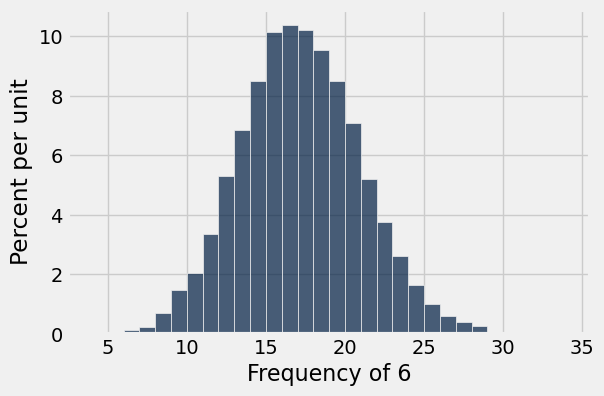

In [13]:
bins = np.arange(4, 35, 1)

# Create the histogram
histogram = Table().with_column('Frequency of 6', die_rolls).hist(bins=bins)

4. **Evaluation**

    After conducting the experiment, you can compare the actual frequency of 6 to the expected number. If the actual number deviates significantly from 16%~17%, it may indicate a bias in the die!

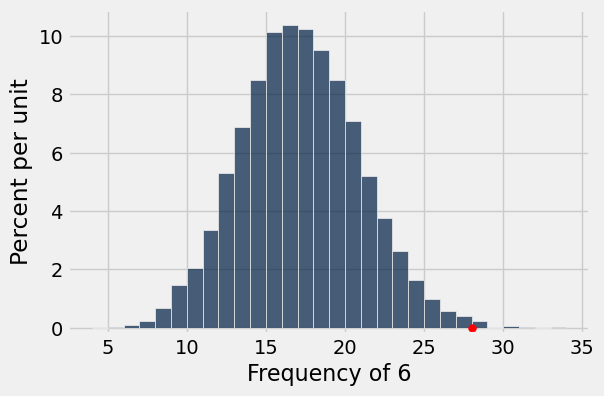

In [16]:
Table().with_column(
    'Frequency of 6', die_rolls
).hist(bins = bins)
plots.ylim(-0.002)
plots.scatter(28, 0, color='red', s=30);

We know from earlier that after rolling the die from our friend a 100 times, it landed on `6` 28 times. The histogram of simulated tosses is redrawn above with value the 28 shown as a red dot on the horizontal axis. The dot is very far out in the right hand tail of the histogram. Very few of the 20,000 repetitions (of rolling a die 100 times) simulated by the random model came out to be 28 or more. Therefore, it would be safe to conclude that the die is indeed not fair!

# Decisions and Uncertainty

Now let's use the help of *ChatGPT* to study another example!

But first, let's clarify something! The methods that we used earlier to assess whether the die was fair or not, fall into a general framework of decision making called *statistical tests of hypotheses*.
Generally speaking, what statistical tests are trying to do is choose between two views of the world. Specifically, the choice is between two views about how the data were generated. These two views are called **hypotheses**!

There are two types of hypotheses:

1. **The null hypothesis**
    This is a clearly defined model about chances. It says that the data were generated at random under clearly specified assumptions about the    randomness. The word “null” reinforces the idea that if the data look different from what the null hypothesis predicts, the difference is due to nothing but chance. From a practical perspective, the null hypothesis is a hypothesis under which you can simulate data. Under this hypothesis, we can simulate random samples by using say `sample_proportions`.

It serves as the default or baseline assumption that there is no significant effect, relationship, or difference in the population parameters being studied. In simpler terms, the null hypothesis (often denoted as **H0**) represents the idea that any observed differences or patterns in your data are purely due to random chance or sampling variability. It acts as a sort of "status quo" or "no effect" statement that researchers aim to test against. For example, if you are comparing the mean scores of two groups, the null hypothesis might state that there is no significant difference in the means of the two groups.


    
3. **The alternative hypothesis** In the context of data science, it is a statement that contradicts the null hypothesis. This says that some reason other than chance made the data differ from the predictions of the model in the null hypothesis.

It represents the researcher's specific claim or expectation about the population parameters being studied. Unlike the null hypothesis, the alternative hypothesis (often denoted as **H1**) asserts that there is a significant effect, relationship, or difference in the data. In simpler terms, the alternative hypothesis is what researchers are trying to find evidence for. It states that the observed patterns or differences in the data are not merely due to random chance but are a result of a real and meaningful effect. For example, if you are conducting a study comparing the mean scores of two groups, the null hypothesis might state that there is no significant difference in the means, while the alternative hypothesis would assert that there is a specific difference in the means.


Too much information! I know! But bear with me and everything will become more clear after the following example!le!*

In [3]:
university_rankings = Table().read_table("data/world_university_rankings.csv")
university_rankings 

rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96
2,Stanford University,United States,93.1,91.9,100,83.5,91.8,98.2
3,University of Oxford,United Kingdom,91.3,81.7,89.4,94.5,97.4,93.5
4,"University of California, Berkeley",United States,90.6,95.2,90.6,83.5,92.7,91.1
5,Peking University,China,90.4,74.5,95.4,94,91.8,96.3
6,Tsinghua University,China,89.6,82.5,99.5,77.7,95.2,93.2
7,University of Cambridge,United Kingdom,89.4,86.6,76.7,95.4,94.6,93.8
8,ETH Zurich,Switzerland,88.3,87.1,99.5,96.4,83.1,75.2
9,Harvard University,United States,87.1,95.2,69.8,82.1,93.4,95
10,National University of Singapore,Singapore,86.8,79.7,97.9,80.4,95.9,79.9


You propose the following model. For every American university there is a 68% chance that it has an overall score that is higher than the average overall score of all the universities. 

First things first! Let's define our *null* and *alternative* hypotheses. The *null hypothesis* states that the assumptions of your model are good. In other words, each American university has a 68% chance of having an overall score that is higher than the average of all the universities.
The *alternative hypothesis* simply states that each American university does **not** have a 68% chance of having an overall score that is higher than the average of all the universities. Simple, right?

We will use our data to perform a test of hypotheses and see if our model looks good.

In [35]:
%%ai openai-chat:gpt-3.5-turbo
I have a sorted table of university rankings which is a Table object from the datascience python module. It has the date of the rank, the institution title, the overall score, the location etc. I want to calculate
average overall score of the universities. Please give me python code using numpy to do this without importing any new modules.

```markdown
import numpy as np

# Extract the overall scores of all universities
overall_scores = university_rankings.column('Overall Score')

# Calculate the average overall score of all universities
average_score_all = np.mean(overall_scores)

average_score_all
```

In [36]:
# Extract useful code from chatgpt's response and correct it!!
average_score_all = np.mean(university_rankings.column('Overall scores'))
average_score_all

44.430769230769229

Now let's create a table that shows the number of American universities that have an overall score that is higher than the average.

In [110]:
%%ai openai-chat:gpt-3.5-turbo
I have a sorted table of university rankings which is a Table object from the datascience python module. 
It has the date of the rank, the institution title, the overall score, the location etc. 
I want to create a new table object that shows only the number of American universities that have an overall score that is higher than the average of all the 
universities vs the number of American universities that dont have an overall score that is higher than the average. 
Please give me python code using numpy and datascience modules


Here is the python code to accomplish the task:

```python
# Calculating the average overall score of all universities
average_score = np.average(table.column('Overall Score'))

# Filtering the American universities with scores higher than the average
higher_than_average = table.where('Location', are.equal_to('United States')) \
                          .where('Overall Score', are.above(average_score))

# Counting the number of American universities that meet the condition
num_higher_than_average = higher_than_average.num_rows

# Counting the number of American universities that don't meet the condition
num_lower_than_average = table.num_rows - num_higher_than_average

# Creating a new table to display the results
result_table = Table().with_columns([
    'Condition', ['Higher than Average', 'Lower than Average'],
    'Count', [num_higher_than_average, num_lower_than_average]
])

# Displaying the result in markdown format
result_table.show()
```

Output (in markdown format):

|     Condition      | Count |
|--------------------|-------|
| Higher than Average |   10  |
| Lower than Average |   15  |

Note: Replace `table` with the actual name of your table object.

In [38]:
# Extract useful code from chatgpt's response and correct it

average_score_all = np.average(university_rankings.column('Overall scores'))
# Filtering the American universities with scores higher than the average (of all universities)
higher_than_average = university_rankings.where('location', are.equal_to('United States')) \
                          .where('Overall scores', are.above(average_score_all))

# Counting the number of American universities that meet the condition
num_higher_than_average = higher_than_average.num_rows

# Counting the number of American universities that don't meet the condition
num_lower_than_average = university_rankings.where('location', are.equal_to('United States')).num_rows - num_higher_than_average

# Creating a new table to display the results
result_table = Table().with_columns([
    'Condition', ['Higher than Average', 'Lower than Average'],
    'Count', [num_higher_than_average, num_lower_than_average]
])

# Displaying the result in markdown format
result_table.show()

Condition,Count
Higher than Average,89
Lower than Average,54


The next step is to choose the statistic that will help you decide between the two hypotheses, a.k.a. the *test statistic*!
For example, an appropriate test statistic could be the *total variation distance*. In this case, the total variational distance comes down to the distance between the sample percent of American universities that have an overall score higher than the average and 68%, which is the corresponding percent in the model you originally assumed.

Now that you have collected the data that you're interested in, let's calculate the *observed value of the statistic*.

In [39]:
# observed chance that a US university has overall score above average (in %)
(89/(54+89)) * 100

62.23776223776224

In [44]:
%%ai openai-chat:gpt-3.5-turbo
I have a sorted table of university rankings which is a Table object from the datascience python module. 
It has the date of the rank, the institution title, the overall score, the location etc. 
What is the probability that a US university has overall score above average score of all universities?

```markdown
# Extract the overall scores of all universities
overall_scores = university_rankings.column('Overall Score')

# Calculate the average overall score of all universities
average_score_all = np.mean(overall_scores)

# Filter the table to get the rows corresponding to universities in the United States
us_universities = university_rankings.where('Location', are.equal_to('United States'))

# Extract the overall scores of these universities
us_scores = us_universities.column('Overall Score')

# Calculate the number of US universities with overall score above average score of all universities
num_above_average_all = np.count_nonzero(us_scores > average_score_all)

# Calculate the probability that a US university has overall score above average score of all universities
probability_above_average_all = num_above_average_all / len(us_scores)

probability_above_average_all
```

In [40]:
observed_statistic = abs ( 100 * (89 / 143) - 68)
observed_statistic

5.76223776223776

What does this value signify?

This test statistic is essentially the distance between the two distributions. It makes sense and is easy to use. The test statistic is simulated based on the assumptions of the model in the null hypothesis (our null hypothesis supports that each American university has a 68% chance of having an overall score that is higher than the average of all the universities). That model involves chance, so the statistic comes out differently when you simulate it multiple times.

A sample percentage of around 68% will be consistent with your model, but percentages much bigger or much less than 68 will make you think that the model isn’t good. Therefore, small values of the distance (from your model) will make you lean towards the null hypothesis. Big values of the statistic will make you lean towards the alternative. Keep this in mind while choosing your statistic! Here the distance metric that we chose allows us to do lean towards alternative if the value is big and towards null if the value is small!

=> In our case, a total variational distance of `5.76` suggests that there is a significant difference between the observed sample data and the model assumption of 68% probability. This difference provides evidence against the null hypothesis (where each American university has a 68% chance of having an overall score higher than the average) and supports the alternative hypothesis instead.

Now let's assume a more reasonable model and go with 61% instead of 68%. 

In [69]:
observed_statistic = abs (100 * (89 / 143) - 61)
observed_statistic

1.2377622377622401

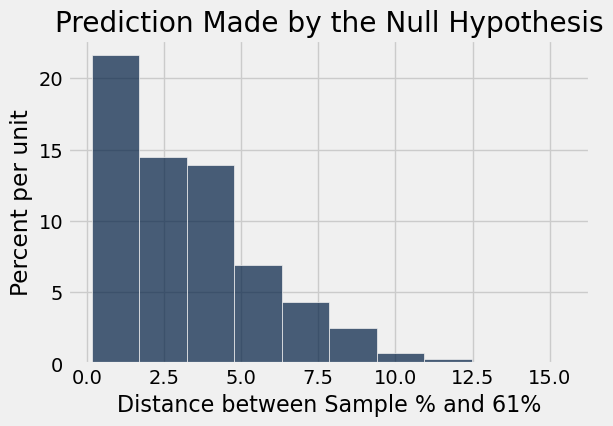

In [68]:
model_proportions = make_array(0.61, 0.39)
model_proportions_pos = model_proportions.item(0)
sample_size = 143

def one_simulated_distance():
    sample_proportion_pos = sample_proportions(143, model_proportions).item(0)
    return 100 * abs(sample_proportion_pos - model_proportions_pos)
    
repetitions = 10000
distances = make_array()

for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())


# This is the histogram of the distribution of the test statistic predicted by the null hypothesis.
Table().with_column(
    'Distance between Sample % and 61%', distances
).hist() # rmember that hist by default will bin it into 10 intervals
plots.title('Prediction Made by the Null Hypothesis');

Finally, let's see where our observed statistic falls on the histogram to draw our conclusions.

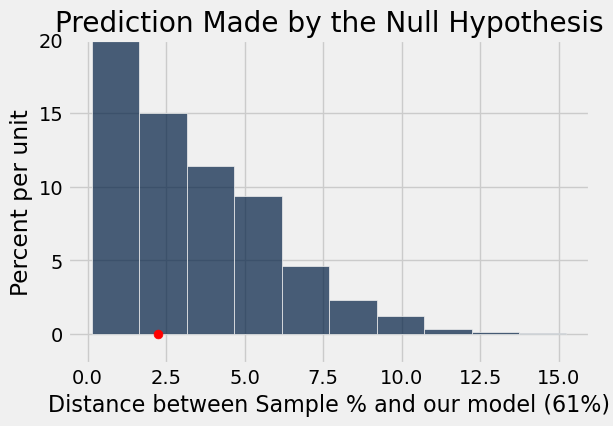

In [67]:
Table().with_column(
    'Distance between Sample % and our model (61%)', distances
).hist()
plots.ylim(-0.02, 0.2) # this is just to help you see the red dot (observed statistic) better
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(observed_statistic, 0, color='red', s=40);

The observed statistic is like a typical distance predicted by the null hypothesis. Now, from a quick glance, it seems like the null hypothesis is our model (the red dot seems to be in the heart of the distribution). How do we conclude that the data are consistent with our model or in other words, our model looks good?

Hmmm...the answer is not as clear as it was with the die example. It depends on whether you think the red dot is too far from the bulk of the predicted values to be consistent with the prediction based on your model. But, thankfully enough we have a way to quantify if 'far' is too far. Enter ***p-value*** or *observed significance level* of a test!

The p-value of a test is the chance, based on the model in the null hypothesis (in our case, the 61% one), that the test statistic will be equal to the observed value in the sample or even further in the direction that supports the alternative.

If a p-value is small, that means the tail beyond the observed statistic is small and so the observed statistic is far away from what the null predicts. This implies that the data support the alternative hypothesis more than they support the null.

Go back to the die roll example now and look at the histogram to see if you can relate to these concepts!s!

In [49]:
%%ai openai-chat:gpt-3.5-turbo
ELI5 p-value in probability

```markdown
In probability, p-value is a measure that helps us determine the strength of the evidence against a null hypothesis. When conducting a hypothesis test, the p-value tells us the probability of observing the data we have or something more extreme if the null hypothesis is true.

A low p-value (typically less than 0.05) suggests that the observed data is unlikely to have occurred if the null hypothesis is true, therefore providing evidence against the null hypothesis. On the other hand, a high p-value indicates that the data is likely to occur even if the null hypothesis is true, suggesting that there is not enough evidence to reject the null hypothesis.
```

Now that we know what the *p-value* is, let's calculate it for our problem.


In [70]:
# this is the p-value for our problem!
# If the p-value is less than 5%, it is considered small and the result is called “statistically significant.”
# If the p-value is even smaller – less than 1% – the result is called “highly statistically significant.”
# Typically, along with your conclusion, provide the observed statistic and the p-value as well, so that readers can use their own judgment.
np.count_nonzero(distances >= observed_statistic) / repetitions

0.7973

About 79.7% of the distances simulated under your model were ~1.24 or greater. By the law of averages, we can conclude that if your model was correct then there is about a 79.7% chance that the test statistic would be 1.24 or more.

Based on what *ChatGPT* mentioned earlier, if we consider the typical threshold of 0.05, that does seem like a big chance indicating that the observed data is reasonably likely to occur by chance alone or in other words, it supports our null hypothesis (that each American university has a 61% chance of having an overall score that is higher than the average of all the universities).

#### Recall law of averages

If a chance experiment is repeated independently and under identical conditions, then, in the long run, the proportion of times that an event occurs gets closer and closer to the theoretical probability of the event.

For example, in the long run, the proportion of times the face with four spots appea on a diers gets closer and closer to 1/6.

Here “independently and under identical conditions” means that every repetition is performed in the same way regardless of the results of all the other repetitions.

# A/B Testing

Now you will learn how to decide on whether two numerical samples come from the same underlying distribution!

In [136]:
%%ai openai-chat:gpt-3.5-turbo
Explain the A/B testing to a beginner in terms of deciding whether two numerical samples come from the same underlying distribution. 
Return your answer in markdown for better formatting.

A/B testing is a statistical method used to determine if two numerical samples come from the same underlying distribution. It involves comparing two groups (Group A and Group B) to see if there is a significant difference between them.

Here's how A/B testing works:

1. **Hypothesis**: First, we start with a null hypothesis (H0) that assumes there is no difference between the two groups. The alternative hypothesis (Ha) assumes that there is a significant difference.

2. **Randomization**: Next, we randomly assign individuals to either Group A or Group B. This randomization helps to ensure that any differences observed between the groups are due to the treatment and not other factors.

3. **Data Collection**: We collect data from both groups, usually measuring a specific variable of interest. For example, if we are testing the effectiveness of two different marketing strategies, we may measure the number of conversions for each strategy.

4. **Statistical Analysis**: Using statistical techniques, we analyze the collected data to determine if there is a significant difference between the two groups. Commonly used statistical tests include t-tests, chi-square tests, or ANOVA (analysis of variance).

5. **Interpretation**: Based on the statistical analysis, we either reject or fail to reject the null hypothesis. If we reject the null hypothesis, it means there is evidence to suggest that the two groups come from different distributions. If we fail to reject the null hypothesis, it means there is not enough evidence to conclude a significant difference between the groups.

A/B testing helps in making data-driven decisions by providing evidence of whether two numerical samples come from the same underlying distribution. By comparing the groups and analyzing the results, we can determine which option performs better and make informed decisions based on the data.

To put that into perspective, you will conduct a new study. You aim to see whether the *research quality score* of **all** the universities is associated with their *overall score* being higher or lower than the average. 

For that, let’s first look at the distribution of the research quality scores of the universities that have overall scores that are higher than the average compared to the universities that have overall scores that are below the average.

In [72]:
average_score = np.average(university_rankings.column('Overall scores'))

# Filtering universities with scores higher than the average
higher_than_average = university_rankings\
                          .where('Overall scores', are.above(average_score))

# Counting the number of universities that meet the condition
num_higher_than_average = higher_than_average.num_rows

# Counting the number of non-American universities that don't meet the condition
num_lower_than_average = university_rankings.num_rows - num_higher_than_average

# Creating a new table to display the results
result_table = Table().with_columns([
    'Condition', ['Higher than Average', 'Lower than Average'],
    'Count', [num_higher_than_average, num_lower_than_average]
])
result_table

Condition,Count
Higher than Average,429
Lower than Average,481


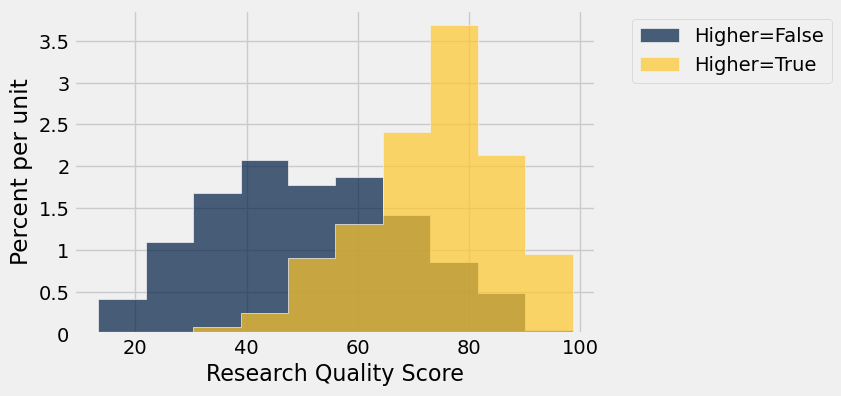

In [73]:
def check_average(val):
    if val>np.average(university_rankings.column('Overall scores')):
        return True
    else:
        return False


university_subset = university_rankings\
.with_column("Higher",university_rankings.apply(check_average,"Overall scores"))

university_subset.group("Higher")
university_subset.hist('Research Quality Score', group = 'Higher')

You can observe that even though there is some distance between the averages of the two distributions, there is a significant amount of overlap happening between the histograms. This raises the question of whether the difference reflects just chance or a difference in the distributions in the larger population of universities.

Alright. It's time for another test hypothesis!

First, define your *null* and *alternative* hypotheses. As a *null* hypothesis you can assume that the two distributions are identical but the differences that we observed on the graph above are attributed to chance. As an *alternative* hypothesis you can assume that among all the universities, the ones that have an overall score above the average, have a higher research quality score while the ones that have an overall score below the average, have a lower research quality score.

What's next? Of course, you need to define your test statistic. It would be reasonable for you to use the difference between the two group means as your statistic, right? Yes and that is because the alternative hypothesis compares the averages of the research quality score for the two groups of universities.

In [74]:
ave1=np.average(university_rankings.where('Overall scores', are.above(average_score)).column('Research Quality Score'))
ave2=np.average(university_rankings.where('Overall scores', are.below(average_score)).column('Research Quality Score'))
result_table = result_table.with_columns([
    'Average', [ave1, ave2]
])
result_table

Condition,Count,Average
Higher than Average,429,73.6242
Lower than Average,481,50.9807


In [76]:
means = result_table.column(2)
observed_difference = means.item(1) - means.item(0)
observed_difference

-22.643577143577147

Now the only thing left to do is for you to figure out how to simulate the statistic under the null hypothesis. Thankfully enough we have tests that are based on random permutations of the data and are called *permutation tests*. Wait, what?

In [173]:
%%ai openai-chat:gpt-3.5-turbo
Explain the random permutation test to a beginner. Return your answer in markdown for better formatting.

The random permutation test is a statistical method used to assess the significance of an observed result by comparing it to a distribution of randomly permuted data. Here is how it works:

1. Start with a dataset containing your observed measurements or values.

2. Identify the specific statistic or measure that you want to test. It could be a mean, median, correlation coefficient, or any other relevant measure.

3. Randomly shuffle (permute) the values of your dataset, while keeping the associations between variables intact. For example, if you have two variables X and Y, make sure that the X and Y values remain paired in the permuted dataset.

4. Calculate the statistic of interest (e.g., mean, median) using the permuted dataset.

5. Repeat steps 3 and 4 a large number of times (e.g., 1000) to create a distribution of statistics generated from randomly permuted data.

6. Compare the observed statistic (from step 2) with the distribution of permuted statistics. Determine the proportion of permuted statistics that are more extreme than the observed statistic.

7. This proportion represents the p-value, which tells you the likelihood of obtaining a statistic as extreme as the observed one by chance alone. A smaller p-value indicates stronger evidence against the null hypothesis (i.e., that there is no significant effect or relationship).

By using random permutations, the test allows you to generate a null distribution under the assumption of no effect, enabling you to assess the significance of your observed result in a robust and unbiased manner.

An implementation will help.

First you are going to need a function that computes the difference between the means.



In [79]:
def difference_of_means(table, group_label):
    reduced = table.select('Research Quality Score', group_label)

    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

For convenience, let's keep only three columns of the original table.

In [80]:
university_reduced = university_rankings.with_column("Higher",university_rankings.apply(check_average,"Overall scores")).select("ranking-institution-title",'Higher','Research Quality Score')
university_reduced

ranking-institution-title,Higher,Research Quality Score
Massachusetts Institute of Technology,True,92.2
Stanford University,True,91.9
University of Oxford,True,81.7
"University of California, Berkeley",True,95.2
Peking University,True,74.5
Tsinghua University,True,82.5
University of Cambridge,True,86.6
ETH Zurich,True,87.1
Harvard University,True,95.2
National University of Singapore,True,79.7


Now let's shuffle!

In [81]:
shuffled_labels = university_reduced.sample(with_replacement = False).column(1)
original_and_shuffled = university_reduced.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled

ranking-institution-title,Higher,Research Quality Score,Shuffled Label
Massachusetts Institute of Technology,True,92.2,False
Stanford University,True,91.9,True
University of Oxford,True,81.7,False
"University of California, Berkeley",True,95.2,True
Peking University,True,74.5,False
Tsinghua University,True,82.5,False
University of Cambridge,True,86.6,False
ETH Zurich,True,87.1,False
Harvard University,True,95.2,True
National University of Singapore,True,79.7,False


Now you need to calcualte the distance between the averages of the suffled groups. So let's put your `difference_of_means` function into use. Eventually, you will need to compare that with the original groups.

In [82]:
shuffled_only = original_and_shuffled.select('Research Quality Score','Shuffled Label')
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means
difference_of_means(original_and_shuffled, 'Shuffled Label')

-0.23332073332073122

Now for your convenience let's put everything under a single function!

In [83]:
def one_simulated_difference_of_means():
    # array of shuffled labels
    shuffled_labels = university_reduced.sample(with_replacement=False).column('Higher')
    
    # table of original and shuffled labels
    shuffled_table = university_reduced.select('Research Quality Score').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

one_simulated_difference_of_means()

0.9238644238644298

It is now time to run some permutation test! For that you will need a `for` loop to be able to execute the function you built above multiple times.

In [84]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences = np.append(differences, new_difference) 

Finally, to draw any meaningfull conclusions, you will need to plot the histogramm that shows the distribution of these 5,000 values. By now you should know how. 

Make sure you don't forget to plot the observed statistic as well!

Observed Difference: -22.643577143577147


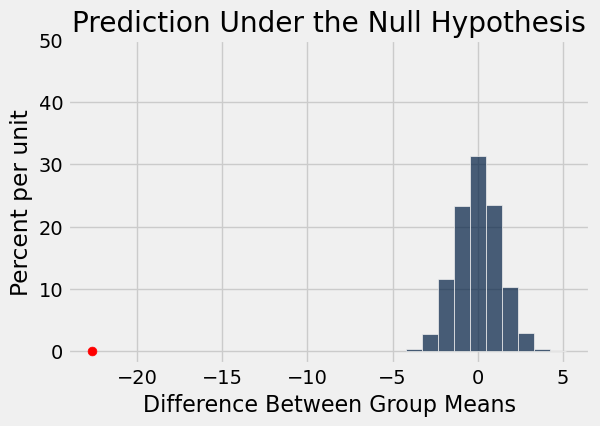

In [85]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');
plots.ylim(-0.02, 0.5)
plots.scatter(observed_difference, 0, color='red', s=40);

You could calculate the *p-value* but let's be honest, the observed difference is so far from the mean that we could safely conclude to the fact that based on the test results data favor the alternative over the null hypothesis (you can assume that among all the universities, the ones that have an overall score above the average, have a higher research quality score while the ones that have an overall score below the average, have a lower research quality score).